In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("C:\\Users\\baqar\\Desktop\\Code_Alpha\\marketing_AB.csv")

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
df.duplicated(subset='user id').sum()

0

In [12]:
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace =True)

In [13]:
df.columns


Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [15]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [16]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


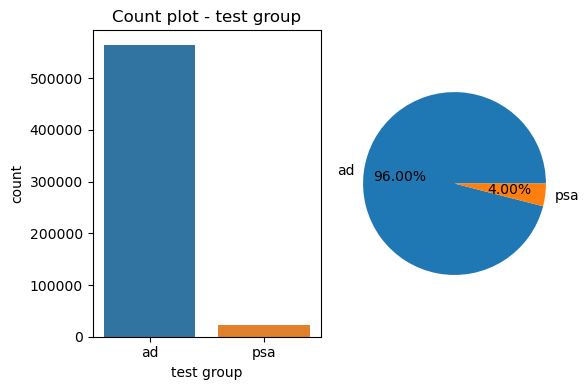

In [20]:
variable = 'test group'
plt.figure(figsize = (6, 4))

plt.subplot(1,2,1)
sns.countplot(x = variable, data=df_cat)
plt.title(f'Count plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')

plt.tight_layout()
plt.show()

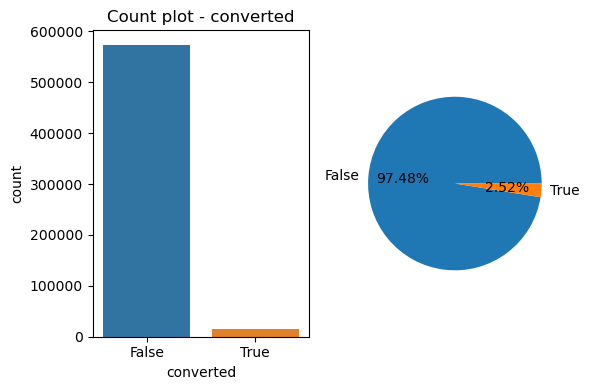

In [21]:
variable = 'converted'
plt.figure(figsize = (6, 4))

plt.subplot(1,2,1)
sns.countplot(x = variable, data=df_cat)
plt.title(f'Count plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')

plt.tight_layout()
plt.show()

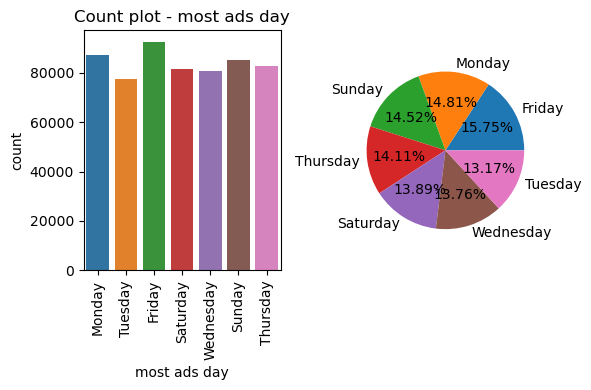

In [24]:
variable = 'most ads day'
plt.figure(figsize = (6, 4))

plt.subplot(1,2,1)
sns.countplot(x = variable, data=df_cat)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation =90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')

plt.tight_layout()
plt.show()

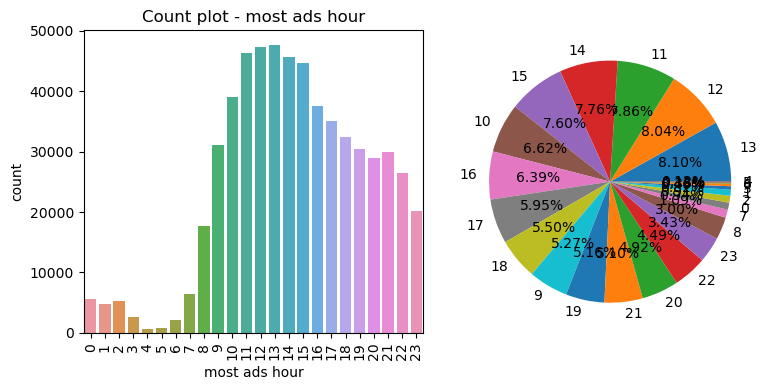

In [27]:
variable = 'most ads hour'
plt.figure(figsize = (8, 4))

plt.subplot(1,2,1)
sns.countplot(x = variable, data=df_cat)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation =90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')

plt.tight_layout()
plt.show()

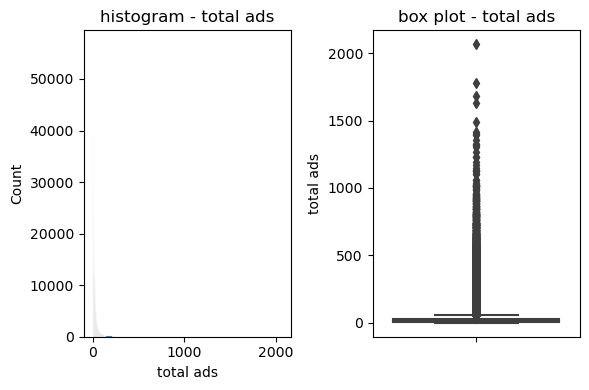

In [29]:
variable = 'total ads'
plt.figure(figsize = (6, 4))

plt.subplot(1,2,1)
sns.histplot(x = variable, data=df)
plt.title(f'histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df)
plt.title(f'box plot - {variable}')

plt.tight_layout()
plt.show()

In [30]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

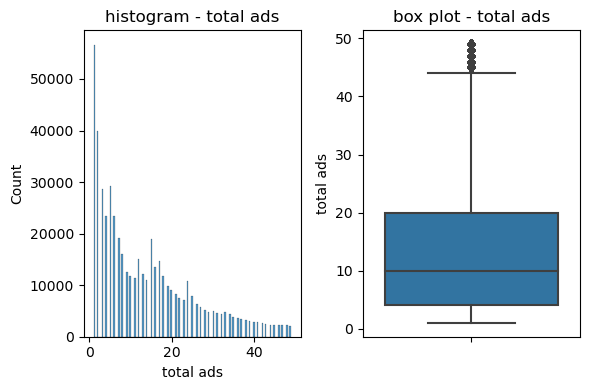

In [31]:
variable = 'total ads'
plt.figure(figsize = (6, 4))

plt.subplot(1,2,1)
sns.histplot(x = variable, data=df[df['total ads']< 50])
plt.title(f'histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df[df['total ads']< 50])
plt.title(f'box plot - {variable}')

plt.tight_layout()
plt.show()

In [54]:
#Statistical Test
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        #create a contigency table
        contigency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        #perform chi
        chi2, p, _, _ = chi2_contingency(contigency_table)
        
        #Display results
        print(f"\n Chi squared test for {variable} vs. converted:")
        print(f"\nChi squared value: {chi2}")
        print(f"p-value: {p}")
        
        #chech for significance
        if p < alpha:
            print(f"The difference in conversion rates accross {variable} is statistically significant.")
        else:
            print(f"there is no significant conversation rates accross {variables}")


 Chi squared test for test group vs. converted:

Chi squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates accross test group is statistically significant.

 Chi squared test for most ads day vs. converted:

Chi squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates accross most ads day is statistically significant.

 Chi squared test for most ads hour vs. converted:

Chi squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates accross most ads hour is statistically significant.


In [55]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [58]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
#normality
shapiro_state_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_state_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])

print (f"shapiro test for normality (true group): p-value = {shapiro_p_value_true}")
print (f"shapiro test for normality (false group): p-value = {shapiro_p_value_false}")

#equality
levene_stat, levene_p_value = levene(df[df["converted"]]["total ads"], df[~df['converted']]["total ads"])
print (f"levene test for equality of variance : p-vale = {levene_p_value}")

shapiro test for normality (true group): p-value = 0.0
shapiro test for normality (false group): p-value = 0.0
levene test for equality of variance : p-vale = 0.0


In [59]:
#suitable test
alpha = 0.05
if shapiro_p_value_true> alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #t-test
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"independent Two sample t-test: p_value = {t_p_value}")
    
else: 
    #u-test
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann whitney U test: p_value = {u_p_value}")

Mann whitney U test: p_value = 0.0


From the shapiro test conduct at second last cell assumptions are not satisfies for any of the samples "The data is Not Normally distributed"
And the variances are not equal so we will be doing a "Mann whitney Test"

Mann whitney concludes that when it comes to the coversion status of people it does make a difference what is the median amount of total ads that they have seen.